# MDS hw2 
R10725026 資管碩一 黃奕滔
## Q1.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read file
data = pd.read_csv("MiningProcess_Flotation_Plant_Database.csv")

In [4]:
# preprocessing and string to float
for col in data.columns:
    if col != "date":
        data[col] = data[col].str.replace(",", ".").astype(float)
data

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.20,16.98,3019.53,557.434,395.713,10.06640,1.74000,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.20,16.98,3024.41,563.965,397.383,10.06720,1.74000,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.20,16.98,3043.46,568.054,399.668,10.06800,1.74000,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,2017-03-10 01:00:00,55.20,16.98,3047.36,568.665,397.939,10.06890,1.74000,249.917,254.487,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,2017-03-10 01:00:00,55.20,16.98,3033.69,558.167,400.254,10.06970,1.74000,250.203,252.136,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737448,2017-09-09 23:00:00,49.75,23.20,2710.94,441.052,386.570,9.62129,1.65365,302.344,298.786,...,313.695,392.160,430.702,872.008,418.725,497.548,446.357,416.892,64.27,1.71
737449,2017-09-09 23:00:00,49.75,23.20,2692.01,473.436,384.939,9.62063,1.65352,303.013,301.879,...,236.700,401.505,404.616,864.409,418.377,506.398,372.995,426.337,64.27,1.71
737450,2017-09-09 23:00:00,49.75,23.20,2692.20,500.488,383.496,9.61874,1.65338,303.662,307.397,...,225.879,408.899,399.316,867.598,419.531,503.414,336.035,433.130,64.27,1.71
737451,2017-09-09 23:00:00,49.75,23.20,1164.12,491.548,384.976,9.61686,1.65324,302.550,301.959,...,308.115,405.107,466.832,876.591,407.299,502.301,340.844,433.966,64.27,1.71


In [5]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X_col = [f for f in data.columns if (f != "date" and f != "% Iron Concentrate" and f != "% Silica Concentrate")]
X = data[X_col]
X = sm.add_constant(X) # add intercept term
y = data["% Silica Concentrate"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


### (a)

In [6]:
# make model
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     % Silica Concentrate   R-squared:                       0.155
Model:                              OLS   Adj. R-squared:                  0.155
Method:                   Least Squares   F-statistic:                     5162.
Date:                  Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                          17:11:55   Log-Likelihood:            -8.5444e+05
No. Observations:                589962   AIC:                         1.709e+06
Df Residuals:                    589940   BIC:                         1.709e+06
Df Model:                            21                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -19.2977      0.331    -58.311      0.000     -19.946     -18.649
% Iron Feed                      0.0075      0.001      6.533      0.000       0.005       0.010
% Silica Feed                    0.0140      0.001     15.614      0.000       0.012       0.016
Starch Flow                  -4.246e-05   1.25e-06    -33.979      0.000   -4.49e-05      -4e-05
Amina Flow                       0.0023   2.24e-05    100.819      0.000       0.002       0.002
Ore Pulp Flow                   -0.0056      0.000    -26.788      0.000      -0.006      -0.005
Ore Pulp pH                     -0.1695      0.004    -38.090      0.000      -0.178      -0.161
Ore Pulp Density                -0.9971      0.027    -36.473      0.000      -1.051      -0.944
Flotation Column 01 Air Flow    -0.0081      0.000    -50.722      0.000      -0.008      -0.008
Flotation Column 02 Air Flow     0.0011   9.31e-05     11.894      0.000       0.001       0.001
Flotation Column 03 Air Flow    -0.0063      0.000    -34.232      0.000      -0.007      -0.006
Flotation Column 04 Air Flow     0.0923      0.001    113.895      0.000       0.091       0.094
Flotation Column 05 Air Flow     0.0085      0.000     20.172      0.000       0.008       0.009
Flotation Column 06 Air Flow    -0.0045      0.000    -27.177      0.000      -0.005      -0.004
Flotation Column 07 Air Flow     0.0044      0.000     25.760      0.000       0.004       0.005
Flotation Column 01 Level       -0.0003   1.88e-05    -15.031      0.000      -0.000      -0.000
Flotation Column 02 Level       -0.0001   1.68e-05     -7.746      0.000      -0.000   -9.69e-05
Flotation Column 03 Level        0.0002    1.5e-05     14.910      0.000       0.000       0.000
Flotation Column 04 Level       -0.0002   2.29e-05     -9.885      0.000      -0.000      -0.000
Flotation Column 05 Level       -0.0014   2.75e-05    -52.652      0.000      -0.002      -0.001
Flotation Column 06 Level        0.0002   2.18e-05      7.645      0.000       0.000       0.000
Flotation Column 07 Level       -0.0003   2.52e-05    -11.618      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    61401.484   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82322.251
Skew:                           0.898   Prob(JB):                         0.00
Kurtosis:                       3.352   Cond. No.                     8.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.43e+05. This might indica

In [7]:
ps = results.pvalues.sort_values()
for idx in ps.index:
    print("{}: {:.100f}".format(idx, ps[idx]))

const: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Flotation Column 05 Level: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Flotation Column 04 Air Flow: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Flotation Column 01 Air Flow: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Amina Flow: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Ore Pulp pH: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Ore Pulp Density: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Flotation Column 03 Air Flow: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Starch Fl

The p-value of all variables seems very low, thus the OLS select method doesn't work very well.  
We can't actually determine which feature is more important using OLS p-value.

### (b) using forward feature selector

In [10]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression


clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf, k_features=22,forward=True, floating=False, scoring='r2', cv=0)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

In [78]:
sfs1.subsets_

{1: {'feature_idx': (8,),
  'cv_scores': array([0.05905288]),
  'avg_score': 0.05905287756637223,
  'feature_names': ('Flotation Column 01 Air Flow',)},
 2: {'feature_idx': (8, 11),
  'cv_scores': array([0.1005426]),
  'avg_score': 0.10054260296276851,
  'feature_names': ('Flotation Column 01 Air Flow',
   'Flotation Column 04 Air Flow')},
 3: {'feature_idx': (8, 11, 19),
  'cv_scores': array([0.12434135]),
  'avg_score': 0.12434135165504157,
  'feature_names': ('Flotation Column 01 Air Flow',
   'Flotation Column 04 Air Flow',
   'Flotation Column 05 Level')},
 4: {'feature_idx': (4, 8, 11, 19),
  'cv_scores': array([0.13717871]),
  'avg_score': 0.13717870589652315,
  'feature_names': ('Amina Flow',
   'Flotation Column 01 Air Flow',
   'Flotation Column 04 Air Flow',
   'Flotation Column 05 Level')},
 5: {'feature_idx': (4, 6, 8, 11, 19),
  'cv_scores': array([0.14388692]),
  'avg_score': 0.14388691557901234,
  'feature_names': ('Amina Flow',
   'Ore Pulp pH',
   'Flotation Column 01

The result of foward feature selection is kind of same as the OLS-p-value method.(Shown as below, all the features are selected.)  
{  
  'avg_score': 0.15523754027531345,  
  'feature_names': ('const',  
   '% Iron Feed',  
   '% Silica Feed',  
   'Starch Flow',  
   'Amina Flow',  
   'Ore Pulp Flow',  
   'Ore Pulp pH',  
   'Ore Pulp Density',  
   'Flotation Column 01 Air Flow',  
   'Flotation Column 02 Air Flow',  
   'Flotation Column 03 Air Flow',  
   'Flotation Column 04 Air Flow',  
   'Flotation Column 05 Air Flow',  
   'Flotation Column 06 Air Flow',  
   'Flotation Column 07 Air Flow',  
   'Flotation Column 01 Level',  
   'Flotation Column 02 Level',  
   'Flotation Column 03 Level',  
   'Flotation Column 04 Level',  
   'Flotation Column 05 Level',  
   'Flotation Column 06 Level',  
   'Flotation Column 07 Level')  
}
### (c)
Yes, the results are consistent. The final $R^2$ value are the same, and both choose all the features.  

### (d)
Because Lasso calculate the penalty terms using L1 norm, while Ridge uses L2 norm.  
When the $\beta$ coefficient of each feature became lower, the shrinkage of L2 norm converge as well.  
That's the main reason that L2 will be extremely difficult approach $0$.  
When the coefficient can't get to $0$, we cannot eliminate the term as feature selection as well.  
In contrast, L1 norm won't change the shrinkage rate while the $\beta$ approach $0$, that's why Lasso outperform Ridge on the field of feature selecting.  

### (e)
Elastic net combine the benefits of Ridge and Lasso.  
Through the linear combination of L1 and L2 norm, users can choose the better norm correponding to the problem and still conduct feature selection.

### (f)


In [21]:
from sklearn.linear_model import Ridge
clf = Ridge()
clf.fit(X_train, y_train)

Ridge()

In [27]:
# clf.coef_.sort()
ridge_sorted = [(f, clf.coef_[idx]) for idx, f in enumerate(X.columns)]
ridge_sorted.sort(key=lambda f: abs(f[1]))
for fn, v in ridge_sorted:
    print("{}: {:.10}".format(fn, v))

const: 0.0
Starch Flow: -4.246385712e-05
Flotation Column 02 Level: -0.0001297654249
Flotation Column 06 Level: 0.0001667616251
Flotation Column 03 Level: 0.0002240853361
Flotation Column 04 Level: -0.0002259369377
Flotation Column 01 Level: -0.0002820178706
Flotation Column 07 Level: -0.0002923436682
Flotation Column 02 Air Flow: 0.001107473032
Flotation Column 05 Level: -0.001448479594
Amina Flow: 0.002259212561
Flotation Column 07 Air Flow: 0.004413179356
Flotation Column 06 Air Flow: -0.004544291408
Ore Pulp Flow: -0.005628016936
Flotation Column 03 Air Flow: -0.006258659257
% Iron Feed: 0.007547165495
Flotation Column 01 Air Flow: -0.00813291505
Flotation Column 05 Air Flow: 0.008537074252
% Silica Feed: 0.0139614479
Flotation Column 04 Air Flow: 0.09232714221
Ore Pulp pH: -0.1695317141
Ore Pulp Density: -0.9964288351


The importance calculated by Ridge is sorted from low to high and shown above.
### (g)

In [28]:
from sklearn.linear_model import Lasso
clf = Lasso()
clf.fit(X_train, y_train)

Lasso()

In [29]:
# clf.coef_.sort()
lasso_sorted = [(f, clf.coef_[idx]) for idx, f in enumerate(X.columns)]
lasso_sorted.sort(key=lambda f: abs(f[1]))
for fn, v in lasso_sorted:
    print("{}: {:.10}".format(fn, v))

const: 0.0
% Iron Feed: -0.0
% Silica Feed: 0.0
Ore Pulp Flow: -0.0
Ore Pulp pH: -0.0
Ore Pulp Density: -0.0
Flotation Column 02 Air Flow: -0.0
Flotation Column 04 Air Flow: 0.0
Flotation Column 05 Air Flow: -0.0
Flotation Column 06 Air Flow: 0.0
Flotation Column 06 Level: -0.0
Flotation Column 01 Level: -2.025069272e-06
Flotation Column 03 Level: 1.275939804e-05
Starch Flow: -6.73083226e-05
Flotation Column 02 Level: -0.0001037380706
Flotation Column 04 Level: -0.0001971976802
Flotation Column 07 Level: -0.0004914104481
Flotation Column 07 Air Flow: 0.0005192697348
Amina Flow: 0.001413072769
Flotation Column 05 Level: -0.001626934765
Flotation Column 03 Air Flow: -0.001805346941
Flotation Column 01 Air Flow: -0.00701129918


The importance calculated by Lasso is sorted from low to high and shown above.

### (h)

In [30]:
from sklearn.linear_model import ElasticNet

clf = ElasticNet()
clf.fit(X_train, y_train)

ElasticNet()

In [31]:
# clf.coef_.sort()
elastic_sorted = [(f, clf.coef_[idx]) for idx, f in enumerate(X.columns)]
elastic_sorted.sort(key=lambda f: abs(f[1]))
for fn, v in elastic_sorted:
    print("{}: {:.10}".format(fn, v))

const: 0.0
% Iron Feed: -0.0
% Silica Feed: 0.0
Ore Pulp Flow: -0.0
Ore Pulp pH: -0.0
Ore Pulp Density: -0.0
Flotation Column 02 Air Flow: -0.0
Flotation Column 04 Air Flow: 0.0
Flotation Column 05 Air Flow: -0.0
Flotation Column 06 Air Flow: 0.0
Flotation Column 06 Level: -0.0
Starch Flow: -7.218626884e-05
Flotation Column 01 Level: -9.215173444e-05
Flotation Column 03 Level: 0.0001522125126
Flotation Column 04 Level: -0.000198369601
Flotation Column 02 Level: -0.0002095913607
Flotation Column 07 Level: -0.0004533282274
Amina Flow: 0.001529765664
Flotation Column 05 Level: -0.001551681473
Flotation Column 07 Air Flow: 0.003010453951
Flotation Column 03 Air Flow: -0.003658869195
Flotation Column 01 Air Flow: -0.007421915933


### (i)
Most of the lower importance feature of Lasso and Elastic net are the same, so we can say that the results of those two are consist.  
However, Ridge cannot do well on feature selection, so the result of Ridge is not valuable.

### (j)
Adaptive elastic net means we can adjust the $\lambda$ value by $\beta$.  
the adaptive Elastic net adds weights to $\lambda$ to try to counteract the known issue of LASSO estimates being biased.  

### (k)

In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     % Silica Concentrate   R-squared:                       0.155
Model:                              OLS   Adj. R-squared:                  0.155
Method:                   Least Squares   F-statistic:                     5162.
Date:                  Tue, 09 Nov 2021   Prob (F-statistic):               0.00
Time:                          18:23:28   Log-Likelihood:            -8.5444e+05
No. Observations:                589962   AIC:                         1.709e+06
Df Residuals:                    589940   BIC:                         1.709e+06
Df Model:                            21                                         
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -19.2977      0.331    -58.311      0.000     -19.946     -18.649
% Iron Feed                      0.0075      0.001      6.533      0.000       0.005       0.010
% Silica Feed                    0.0140      0.001     15.614      0.000       0.012       0.016
Starch Flow                  -4.246e-05   1.25e-06    -33.979      0.000   -4.49e-05      -4e-05
Amina Flow                       0.0023   2.24e-05    100.819      0.000       0.002       0.002
Ore Pulp Flow                   -0.0056      0.000    -26.788      0.000      -0.006      -0.005
Ore Pulp pH                     -0.1695      0.004    -38.090      0.000      -0.178      -0.161
Ore Pulp Density                -0.9971      0.027    -36.473      0.000      -1.051      -0.944
Flotation Column 01 Air Flow    -0.0081      0.000    -50.722      0.000      -0.008      -0.008
Flotation Column 02 Air Flow     0.0011   9.31e-05     11.894      0.000       0.001       0.001
Flotation Column 03 Air Flow    -0.0063      0.000    -34.232      0.000      -0.007      -0.006
Flotation Column 04 Air Flow     0.0923      0.001    113.895      0.000       0.091       0.094
Flotation Column 05 Air Flow     0.0085      0.000     20.172      0.000       0.008       0.009
Flotation Column 06 Air Flow    -0.0045      0.000    -27.177      0.000      -0.005      -0.004
Flotation Column 07 Air Flow     0.0044      0.000     25.760      0.000       0.004       0.005
Flotation Column 01 Level       -0.0003   1.88e-05    -15.031      0.000      -0.000      -0.000
Flotation Column 02 Level       -0.0001   1.68e-05     -7.746      0.000      -0.000   -9.69e-05
Flotation Column 03 Level        0.0002    1.5e-05     14.910      0.000       0.000       0.000
Flotation Column 04 Level       -0.0002   2.29e-05     -9.885      0.000      -0.000      -0.000
Flotation Column 05 Level       -0.0014   2.75e-05    -52.652      0.000      -0.002      -0.001
Flotation Column 06 Level        0.0002   2.18e-05      7.645      0.000       0.000       0.000
Flotation Column 07 Level       -0.0003   2.52e-05    -11.618      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    61401.484   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            82322.251
Skew:                           0.898   Prob(JB):                         0.00
Kurtosis:                       3.352   Cond. No.                     8.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.43e+05. This might indica

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif


[60929.548405879854,
 19.12197994186258,
 18.91095679483645,
 1.3301420312971872,
 2.263651528640353,
 1.1003678956660639,
 1.3548533756644952,
 2.1846456041602256,
 13.4421252951126,
 4.5173288301840495,
 16.61192471312957,
 2.2394771164287146,
 1.3563828793630652,
 11.413709913294593,
 11.585577459380014,
 3.610795275789488,
 2.911605999611141,
 2.9749108315344603,
 2.287977402460759,
 2.852182986668069,
 1.9910812412572085,
 2.451085899516875]

In [35]:
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,const,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level
vif,60929.548406,19.12198,18.910957,1.330142,2.263652,1.100368,1.354853,2.184646,13.442125,4.517329,...,1.356383,11.41371,11.585577,3.610795,2.911606,2.974911,2.287977,2.852183,1.991081,2.451086


Yes, there are multicollinearity problems, through the VIF score we can find many >5 values.  
Besides, the constant term may have a lot of correlation with other columns.

### (l)
Yes, if the Iron Concentrate column is included, the $R^2$ will get much higher.  
The potential issue is that if we can measure Iron Concentrate, maybe we can also measure Silica in Concentrate, there's no need to make prediction anymore.  
If the influence of Iron Concentrate is too big, other features might be meaning less as well, we should do normalization to avoid this problem.

## Q2
### (a)

In [3]:
col_names = pd.read_excel("MDS_Assignment2_Steelplates.xlsx", 0, header=None)
data = pd.read_excel("MDS_Assignment2_Steelplates.xlsx", 1, names=col_names[0].values)
data

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
1,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
2,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
3,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
4,430,441,100250,100337,630,20,87,62357,64,127,...,0.8736,-0.2267,0.9874,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1936,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1937,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1938,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


In [4]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

col_names = data.columns[:27]
X = data[col_names]
X = X.drop(col_names[11], axis=1) # remove collinearity
X = sm.add_constant(X) # add intercept term
y = data["Bumps"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[378,  10],
       [  0,   0]])

Confusion matrix  
true negative = 378, false positive = 10  
false negative = 0, true positive = 0
  
Accuracy = $(TP + TN) / (TP + TN + FP + FN) = 378 / 388 = 0.9742$ 

### (b)
Binary variables shouldn't be put into PCA, so as nominal values.

### (c)
Values in the eigenvector are the linear combination weights of the component.  
Eigenvalues are the proportions of variance.

### (d)

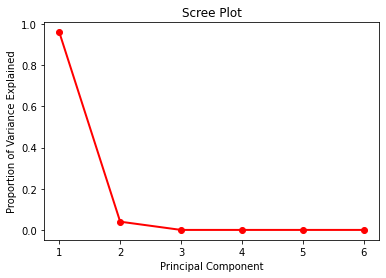

In [7]:
from sklearn.decomposition import PCA
import numpy as np

import matplotlib.pyplot as plt


X_without_bin = X.drop(col_names[12], axis=1)

pca = PCA(n_components=6, svd_solver='auto')
Principal_components = pca.fit_transform(X_without_bin)


PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

3 is the most appropriate number of component.  
The slope decrease significantly after 3 conponents.

### (e)

In [14]:
pca = PCA(n_components=3, svd_solver='auto')
transformed_X = pca.fit_transform(X_without_bin)
transformed_X = pd.DataFrame(transformed_X)
transformed_X["TypeOfSteel_A400"] = X['TypeOfSteel_A400']

# transformed_X
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, shuffle=False)


clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)

confusion_matrix(y_test, y_pred)


/home/cu2189191862/projects/MDS_hw/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/home/cu2189191862/projects/MDS_hw/env/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


array([[ 25, 363],
       [  0,   0]])

Confusion matrix  
true negative = 25, false positive = 363  
false negative = 0, true positive = 0
  
Accuracy = $(TP + TN) / (TP + TN + FP + FN) = 25 / 388 = 0.0644$ 

### (f)
Not consistent. The data count is enough to leverage feature count, there's no need to do dimension reduction.  